In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

В качестве набора данных был взят набор данных «Результаты продаж платьев».

Этот датасет содержит в себе данные о платьях и рекомендации основанные на их продажах. Датасет собирался на основе продаж в разные дни.

Этот датасет можно использовать, для прогнозирования успешности продажи платьев в определенный сезон или предсказания стиля платья по его характеристикам

Данные для исследования находятся в репозитории.

<!--
В состав предлагаемого датасета включены 2 набора данных: обучающий (train) и тестовый (test). -->


In [ ]:
train = pd.read_excel('/content/Attribute_DataSet.xlsx')

In [ ]:
train = train.applymap(lambda s: s.lower() if type(s) == str else s)

<ipython-input-168-cdd47a886180>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(lambda s: s.lower() if type(s) == str else s)


In [ ]:
train

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,sexy,0.0,4.6,m,2.0,o-neck,sleeveless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,casual,0.0,0.0,l,2.0,o-neck,petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,3.0,0.0,l,3.0,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,brief,1.0,4.6,l,1.0,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,0.0,4.5,m,2.0,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,casual,0.0,4.7,m,1.0,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,sexy,0.0,4.3,free,2.0,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,casual,1.0,4.7,m,2.0,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,casual,1.0,4.6,l,0.0,boat-neck,sleeveless,empire,silk,broadcloth,applique,print,1


Описание полей:

1.   Dress_Id: уникальный индекс/номер строки. Это поле - идентификатор платья.
2.   Style: признак - стиль платья (кэжуал, винтажный и т.д.).
3.   Price: цена платья. High - дорого, Average - приемлемо, Low - дешево.
4.   Rating: рейтинг на маркетплейсе.
5.   Size: размер платья M,L, free и т.д.
6.   Season: для какого сезона предназначено.
7.   NeckLine: вырез на шее
8.   SleeveLength: длина рукавов
9.   Waistline: размер талии
10.   Material: материал изделия
11.   FabricType: тип ткани
12.   Decoration: тип стразиков на платье
13.   Pattern Type: тип узора
14.   Recommendation: рекомендация

In [ ]:
train.describe()

,Dress_ID,Price,Rating,Season,Recommendation
count,5.000000e+02,498.000000,500.000000,498.000000,500.000000
mean,9.055417e+08,0.921687,3.528600,1.307229,0.420000
std,1.736190e+08,0.976531,2.005364,1.036549,0.494053
min,4.442820e+08,0.000000,0.000000,0.000000,0.000000
25%,7.673164e+08,0.000000,3.700000,0.000000,0.000000
50%,9.083296e+08,1.000000,4.600000,1.000000,0.000000
75%,1.039534e+09,1.000000,4.800000,2.000000,1.000000
max,1.253973e+09,4.000000,5.000000,3.000000,1.000000


In [ ]:
train.describe(include=['O'])

,Style,Size,NeckLine,SleeveLength,Waistline,Material,FabricType,Decoration,Pattern Type
count,500,500,497,498,413,372,234,264,391
unique,12,6,15,12,4,22,22,24,13
top,casual,m,o-neck,sleeveless,natural,cotton,chiffon,lace,solid
freq,232,177,271,231,304,152,135,70,203


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    float64
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    float64
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   Waistline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 54.8+ KB


In [ ]:
train.isnull().sum()

,0
Dress_ID,0
Style,0
Price,2
Rating,0
Size,0
Season,2
NeckLine,3
SleeveLength,2
Waistline,87
Material,128


In [ ]:
train.Price.describe()

,Price
count,498.000000
mean,0.921687
std,0.976531
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


Для Nan значений в колонках Price и Seasons,берутся их медианные значение.

In [ ]:
train.Price = train.Price.fillna(train.Price.median())
train.Price.describe()

,Price
count,500.000000
mean,0.922000
std,0.974585
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


In [ ]:
train.Season = train.Season.fillna(train.Season.median())
train.Season.describe()

,Season
count,500.000000
mean,1.306000
std,1.034652
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [ ]:
train.isnull().sum()

,0
Dress_ID,0
Style,0
Price,0
Rating,0
Size,0
Season,0
NeckLine,3
SleeveLength,2
Waistline,87
Material,128


In [ ]:
train['SleeveLength'].sort_values().unique()

array(['butterfly', 'cap-sleeves', 'full', 'half', 'halfsleeve', 'petal',
       'short', 'sleeveless', 'sleveless', 'threequarter',
       'turndowncollor', 'urndowncollor', nan], dtype=object)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           500 non-null    float64
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          500 non-null    float64
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   Waistline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 54.8+ KB


Для колонок, Decoration, Neckline, Pattern Type, значение Nan обозначаются как none -> имеется в виду, что дизайном платья они не предусмотрены (например у юбки не может быть вырезана шее)

In [ ]:
train.Decoration.fillna('none', inplace=True)

In [ ]:
train.NeckLine.fillna('none', inplace=True)

In [ ]:
train['Pattern Type'].fillna('none', inplace=True)

Так как в столбце SleeveLength отсутствует только два значения, в интернете были найдены экземпляры платья, и визуально определено значение.

In [ ]:
train.SleeveLength.fillna('half', inplace=True)

Больше половины Nan данных => решено удалить столбец

In [ ]:
train.drop(columns=['FabricType'], inplace=True)

In [ ]:
# функция нахождения медианы в столбце со строковыми значениями
def count_median(s):
    c = s.value_counts()
    return c.index[len(c)//2]

Для столбцов Waistline и Material находятся их медианные значения и подставляются вместо Nan

In [ ]:
med_waistLine = train['Waistline'].agg(count_median)
train.Waistline.fillna(med_waistLine, inplace=True)

In [ ]:
med_Material = train['Material'].agg(count_median)
train.Material.fillna(med_Material, inplace=True)

In [ ]:
train

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,Pattern Type,Recommendation
0,1006032852,sexy,0.0,4.6,m,2.0,o-neck,sleeveless,empire,microfiber,ruffles,animal,1
1,1212192089,casual,0.0,0.0,l,2.0,o-neck,petal,natural,microfiber,ruffles,animal,0
2,1190380701,vintage,3.0,0.0,l,3.0,o-neck,full,natural,polyster,none,print,0
3,966005983,brief,1.0,4.6,l,1.0,o-neck,full,natural,silk,embroidary,print,1
4,876339541,cute,0.0,4.5,m,2.0,o-neck,butterfly,natural,chiffonfabric,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,casual,0.0,4.7,m,1.0,o-neck,full,natural,polyster,none,solid,1
496,722565148,sexy,0.0,4.3,free,2.0,o-neck,full,empire,cotton,none,none,0
497,532874347,casual,1.0,4.7,m,2.0,v-neck,full,empire,cotton,lace,solid,1
498,655464934,casual,1.0,4.6,l,0.0,boat-neck,sleeveless,empire,silk,applique,print,1


In [ ]:
train.isnull().sum()

,0
Dress_ID,0
Style,0
Price,0
Rating,0
Size,0
Season,0
NeckLine,0
SleeveLength,0
Waistline,0
Material,0


(array([174.,   0., 254.,   0.,   0.,  30.,   0.,  21.,   0.,  21.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

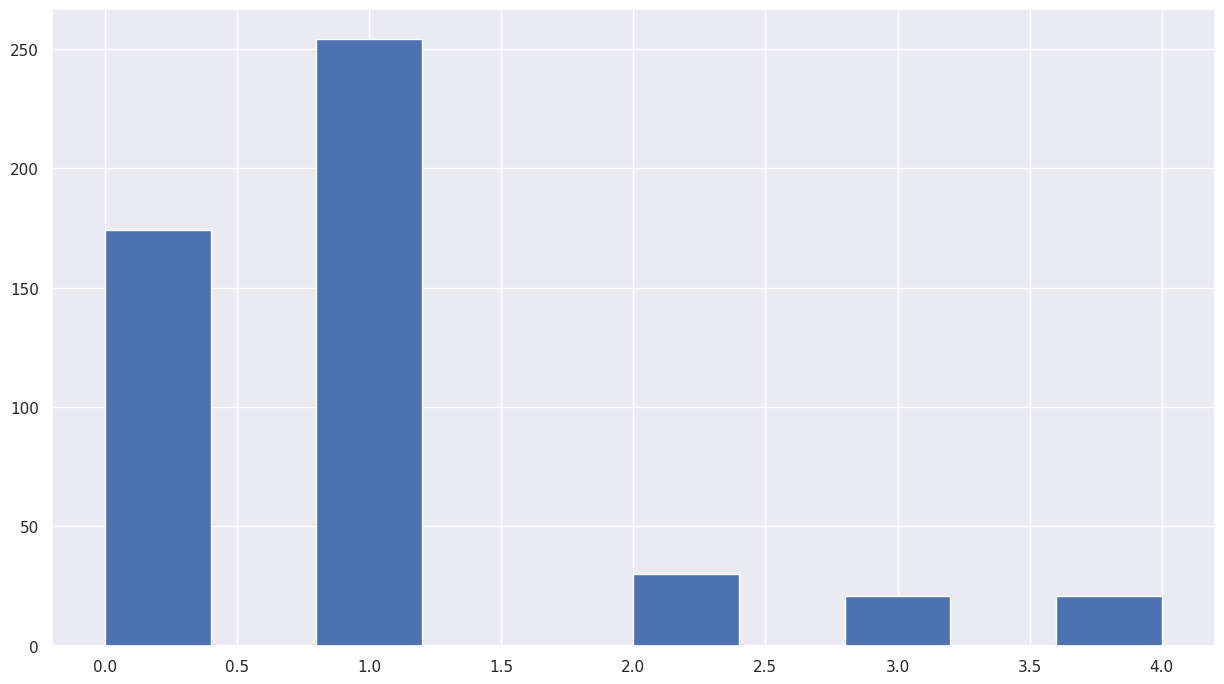

In [ ]:
sns.set_theme(rc={'figure.figsize':(15,8.27)})

plt.hist(train['Price'])

Из гистограммы видно, что больше всего дешевых и ниже среднего платьев

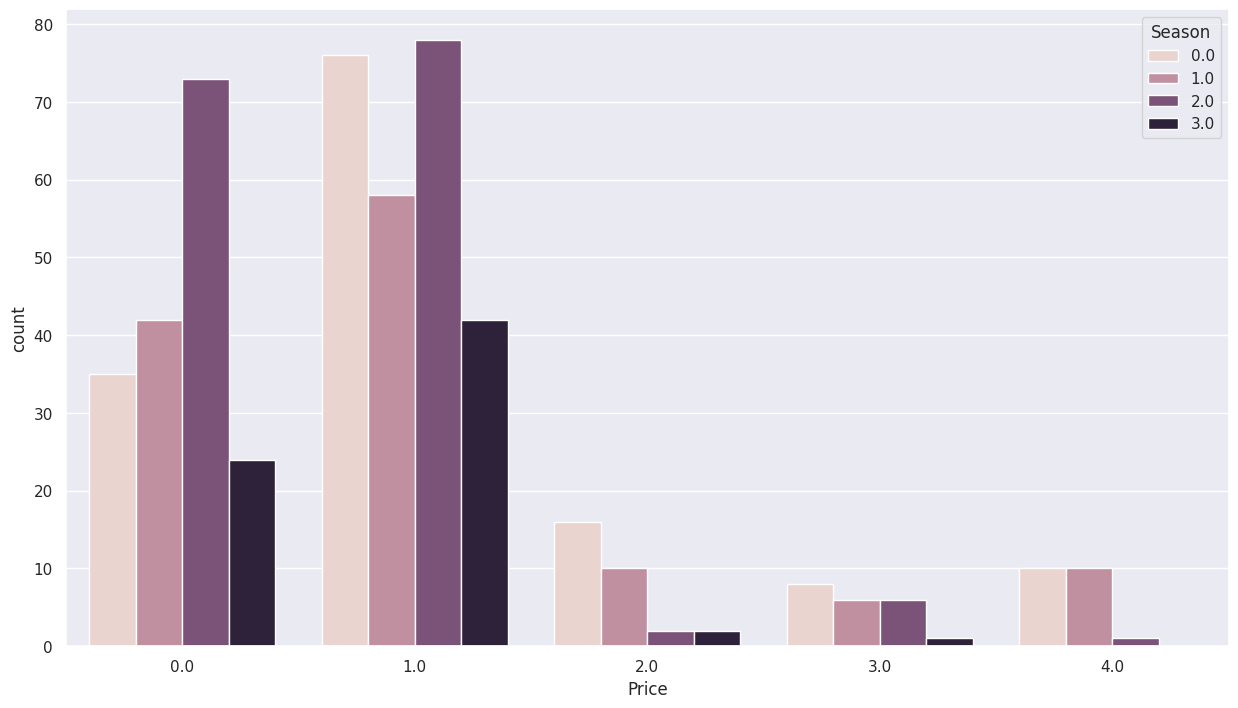

In [ ]:
sns.countplot(data=train, x="Price", hue='Season');

Из гистограммы видно, что больше всего дешевых и ниже среднего платьев по всем сезонам, из этих ценовых категорий больше всего Осенних

(array([120.,   0.,   1.,   0.,   0.,   0.,   1.,   4.,  65., 309.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

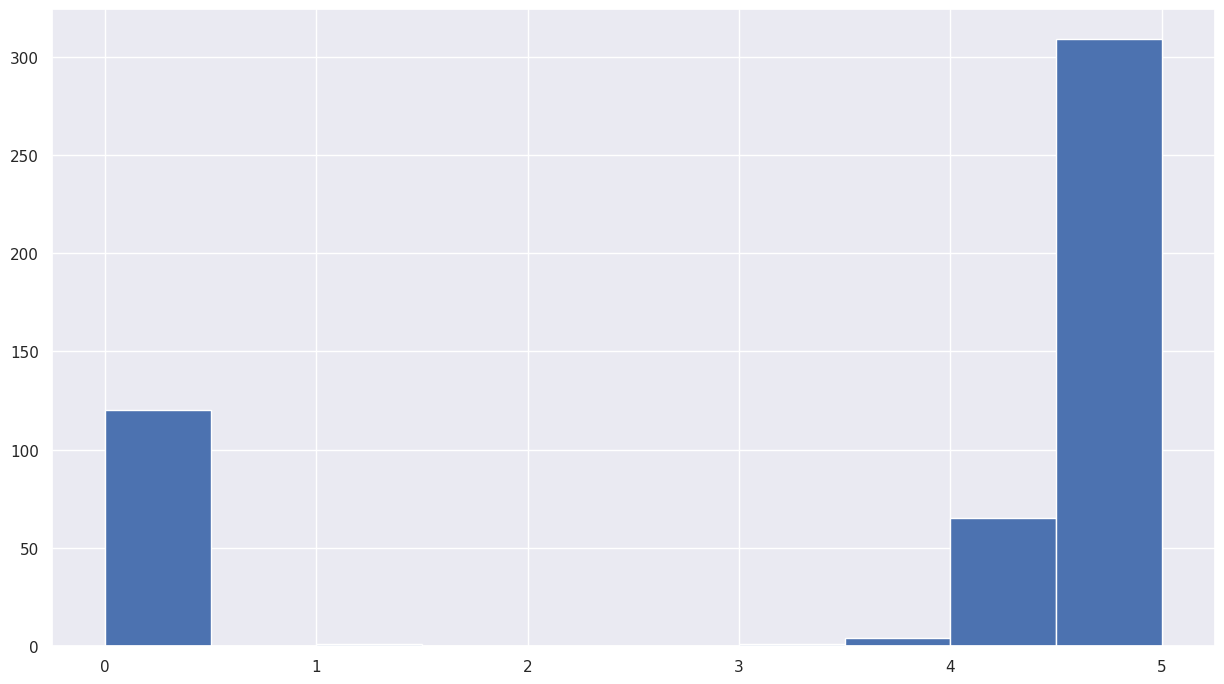

In [ ]:
plt.hist(train['Rating'])

Из гистограммы видно, что большинство платьев имеют высокую пользовательскую оценку

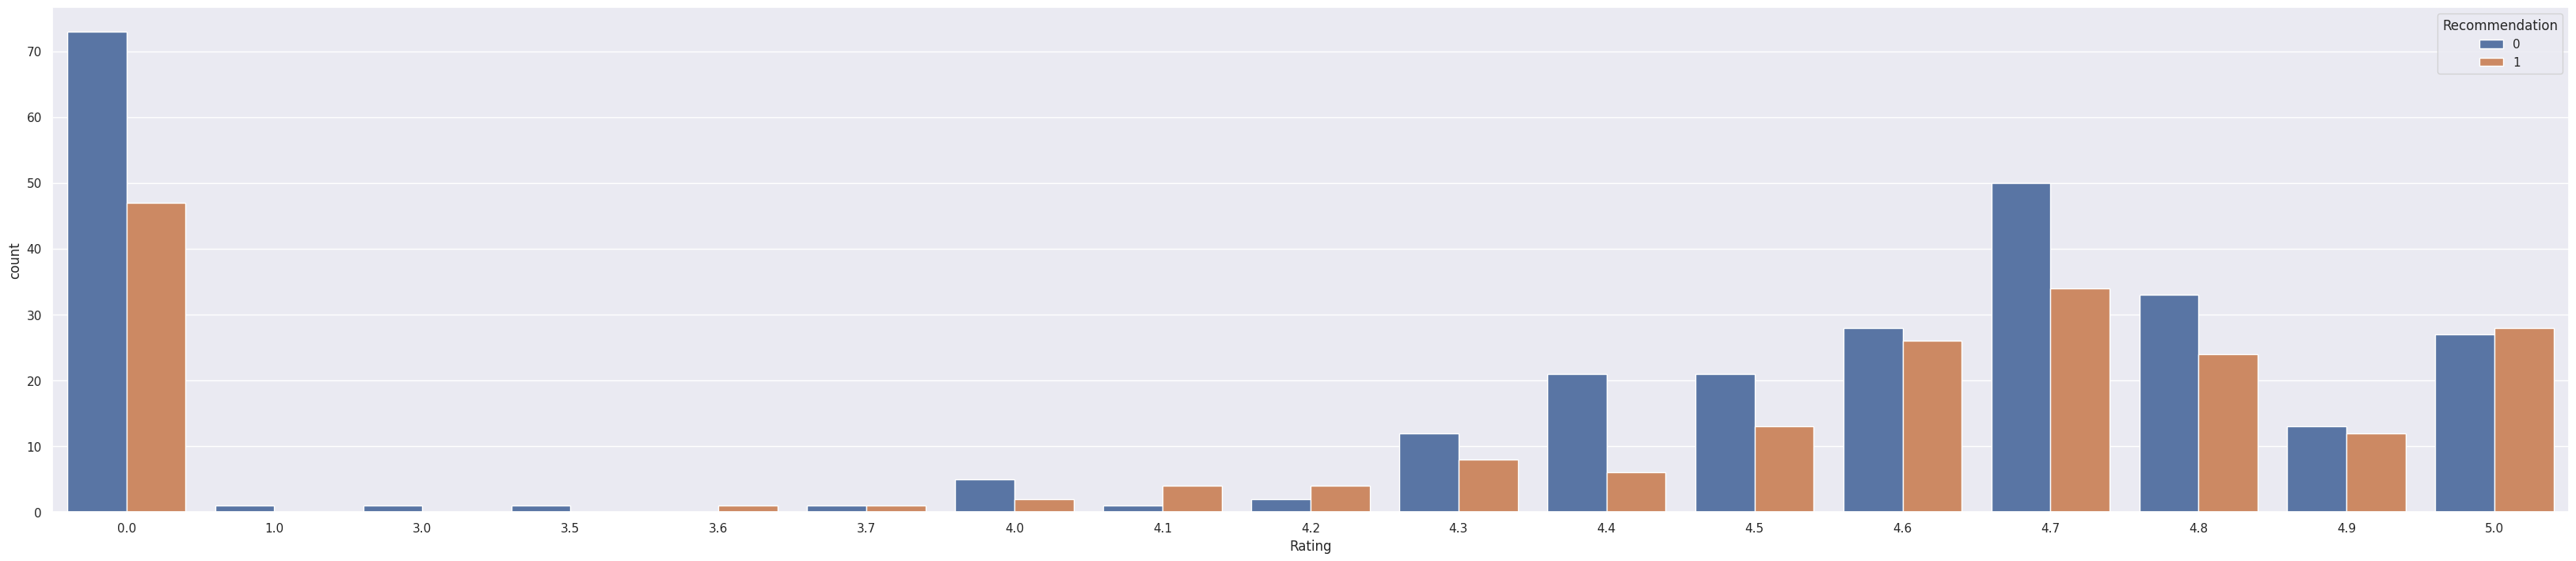

In [ ]:
sns.set_theme(rc={'figure.figsize':(41,8.27)})
sns.countplot(data=train, x="Rating", hue='Recommendation');

Из гистограммы видно, что в независимости от пользовательского рейтинга, количество отрицательных рекомендаций будет больше

Для столбцов с вещественными данными нормализуются значения и удаляются старые столбцы

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()


In [ ]:
train[['mmPrice', 'mmRating', 'mmSeason']] = scaler_mm.fit_transform(train[['Price', 'Rating', 'Season']])
train.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Waistline,Material,Decoration,Pattern Type,Recommendation,mmPrice,mmRating,mmSeason
0,1006032852,sexy,0.0,4.6,m,2.0,o-neck,sleeveless,empire,microfiber,ruffles,animal,1,0.00,0.92,0.666667
1,1212192089,casual,0.0,0.0,l,2.0,o-neck,petal,natural,microfiber,ruffles,animal,0,0.00,0.00,0.666667
2,1190380701,vintage,3.0,0.0,l,3.0,o-neck,full,natural,polyster,none,print,0,0.75,0.00,1.000000
3,966005983,brief,1.0,4.6,l,1.0,o-neck,full,natural,silk,embroidary,print,1,0.25,0.92,0.333333
4,876339541,cute,0.0,4.5,m,2.0,o-neck,butterfly,natural,chiffonfabric,bow,dot,0,0.00,0.90,0.666667


In [ ]:
train.drop(columns=['Price'], inplace=True)
train.drop(columns=['Rating'], inplace=True)
train.drop(columns=['Season'], inplace=True)

In [ ]:
train.head()

,Dress_ID,Style,Size,NeckLine,SleeveLength,Waistline,Material,Decoration,Pattern Type,Recommendation,mmPrice,mmRating,mmSeason
0,1006032852,sexy,m,o-neck,sleeveless,empire,microfiber,ruffles,animal,1,0.00,0.92,0.666667
1,1212192089,casual,l,o-neck,petal,natural,microfiber,ruffles,animal,0,0.00,0.00,0.666667
2,1190380701,vintage,l,o-neck,full,natural,polyster,none,print,0,0.75,0.00,1.000000
3,966005983,brief,l,o-neck,full,natural,silk,embroidary,print,1,0.25,0.92,0.333333
4,876339541,cute,m,o-neck,butterfly,natural,chiffonfabric,bow,dot,0,0.00,0.90,0.666667


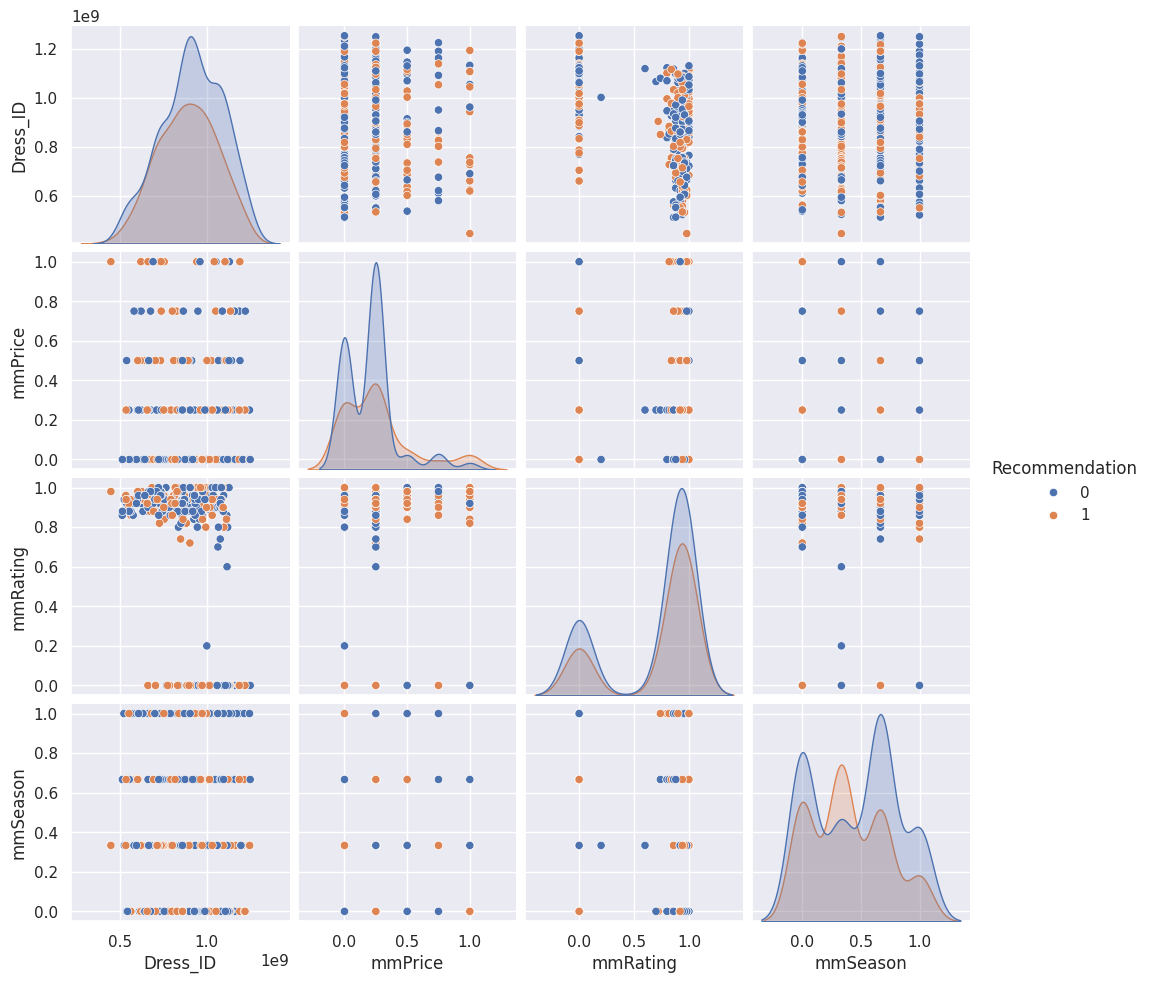

In [ ]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.pairplot(train, kind="scatter", hue="Recommendation");

In [ ]:
train.head()

,Dress_ID,Style,Size,NeckLine,SleeveLength,Waistline,Material,Decoration,Pattern Type,Recommendation,mmPrice,mmRating,mmSeason
0,1006032852,sexy,m,o-neck,sleeveless,empire,microfiber,ruffles,animal,1,0.00,0.92,0.666667
1,1212192089,casual,l,o-neck,petal,natural,microfiber,ruffles,animal,0,0.00,0.00,0.666667
2,1190380701,vintage,l,o-neck,full,natural,polyster,none,print,0,0.75,0.00,1.000000
3,966005983,brief,l,o-neck,full,natural,silk,embroidary,print,1,0.25,0.92,0.333333
4,876339541,cute,m,o-neck,butterfly,natural,chiffonfabric,bow,dot,0,0.00,0.90,0.666667


Разделить Столбец WaistLine по значениям

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
res = enc.fit_transform(train[['Waistline']])
enc.categories_

[array(['dropped', 'empire', 'natural', 'princess'], dtype=object)]

In [ ]:
enc.categories_[0]

array(['dropped', 'empire', 'natural', 'princess'], dtype=object)

In [ ]:
res.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
train[enc.categories_[0]] = res.toarray()

In [ ]:
train.drop(columns=['Waistline'], inplace=True)

Разделить Столбец Size и Material по значениям

In [ ]:
enc = OneHotEncoder()
res = enc.fit_transform(train[['Size']])
enc.categories_

[array(['free', 'l', 'm', 's', 'small', 'xl'], dtype=object)]

In [ ]:
enc.categories_[0]

array(['free', 'l', 'm', 's', 'small', 'xl'], dtype=object)

In [ ]:
res.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [ ]:
train[enc.categories_[0]] = res.toarray()

In [ ]:
train.drop(columns=['Size'], inplace=True)

In [ ]:
enc = OneHotEncoder()
res = enc.fit_transform(train[['Material']])
enc.categories_

[array(['acrylic', 'cashmere', 'chiffonfabric', 'cotton', 'knitting',
        'lace', 'linen', 'lycra', 'microfiber', 'milksilk', 'mix', 'modal',
        'model', 'nylon', 'other', 'polyster', 'rayon', 'shiffon', 'silk',
        'spandex', 'viscos', 'wool'], dtype=object)]

In [ ]:
enc.categories_[0]

array(['acrylic', 'cashmere', 'chiffonfabric', 'cotton', 'knitting',
       'lace', 'linen', 'lycra', 'microfiber', 'milksilk', 'mix', 'modal',
       'model', 'nylon', 'other', 'polyster', 'rayon', 'shiffon', 'silk',
       'spandex', 'viscos', 'wool'], dtype=object)

In [ ]:
res.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train[enc.categories_[0]] = res.toarray()

In [ ]:
train.drop(columns=['Material'], inplace=True)

In [ ]:
train.head()

,Dress_ID,Style,NeckLine,SleeveLength,Decoration,Pattern Type,Recommendation,mmPrice,mmRating,mmSeason,...,model,nylon,other,polyster,rayon,shiffon,silk,spandex,viscos,wool
0,1006032852,sexy,o-neck,sleeveless,ruffles,animal,1,0.00,0.92,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1212192089,casual,o-neck,petal,ruffles,animal,0,0.00,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1190380701,vintage,o-neck,full,none,print,0,0.75,0.00,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,966005983,brief,o-neck,full,embroidary,print,1,0.25,0.92,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,876339541,cute,o-neck,butterfly,bow,dot,0,0.00,0.90,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# вывод всех уникальных значений для каждого столбца
for col in train:
    print(col,'\n',train[col].sort_values().unique(),'\n',"___________________")


Dress_ID 
 [ 444282011  510519284  511503677  520233308  522776523  531254082
  532874347  535968075  537463111  541172235  547555172  549159213
  549401113  549437715  550959163  555727400  560474456  573923366
  578702321  579010251  593007494  598523814  600514129  605122868
  609889168  616295248  618420156  619817668  619996560  622667306
  624314841  629131530  630561922  636178374  638423913  640823350
  641665398  655464934  658650071  659466129  660016574  660179663
  661795386  662727740  663993130  674192921  674885710  675980168
  676827184  679415939  680070369  682561447  684561284  685606338
  688966772  689406468  689486739  692445545  694493217  699651184
  699738864  702984554  703395323  707537639  709353440  710089916
  711045472  711704151  713391965  713439584  720087997  720099861
  720665176  722020708  722565148  724177834  726446177  727676110
  727820291  730603782  732184480  732650169  732736124  732757918
  733025646  733134203  733715437  734061929  73563

Зависимость цены от Сезона

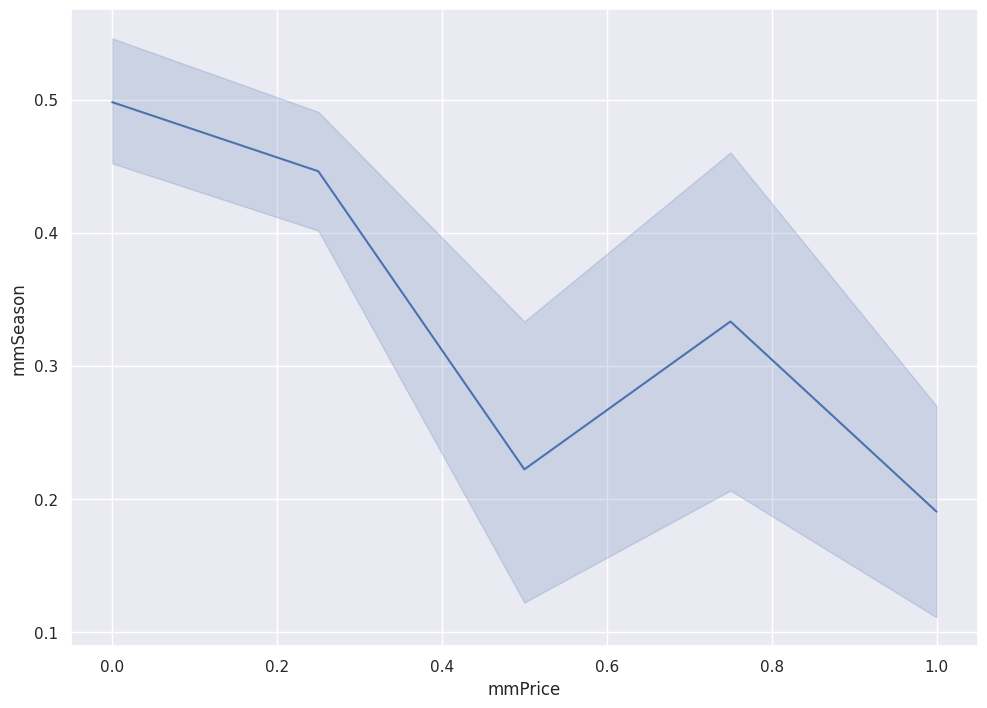

In [ ]:
sns.lineplot(data=train, x='mmPrice', y='mmSeason');

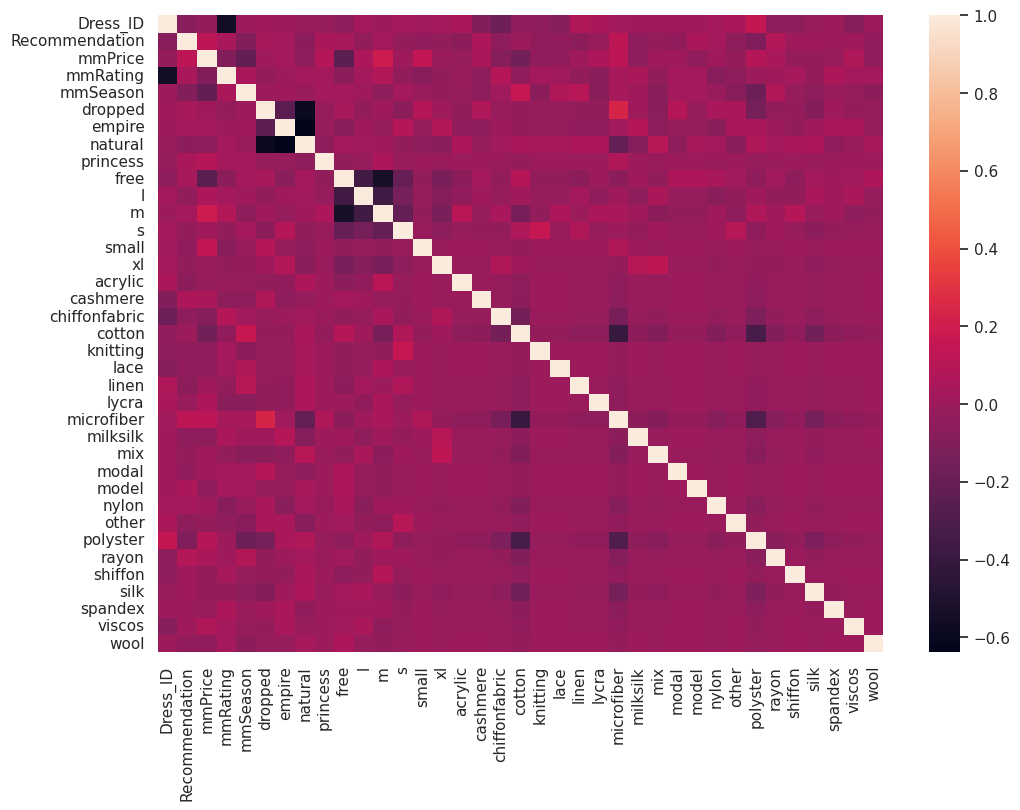

In [ ]:
sns.heatmap(train.corr(numeric_only = True));

По матрице корреляции можно сказать, что столбцы empire и natural не коррелируют

#Сохранение в файл

In [ ]:
train.to_csv('Dresses.csv')